In [9]:
from sklearn import linear_model
import numpy
import pandas
import time
import matplotlib.pyplot as plt

In [10]:
# leitura do dataset iris
dataset = pandas.read_csv('iris.txt')

In [11]:
# exibição dos dados
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Exercício

Para testar o seu algoritmo, execute-o no "iris dataset". Como esses dados tem três classes e a versão padrão da regressão logística trabalha com classificação binária, use a classe "Setosa" e combine as classes "Versiclour" e "Virginica" em uma só de forma que você tenha um problema de classificação binária no final

In [12]:
# formatando a coluna "class" para classificação binária - Setosa e Versicolor-Virginica
dataset.loc[(dataset["classe"] == "Iris-setosa"), "classe"] = "Setosa"

# combinando os valores Iris-versicolor e Iris-virginica
dataset.loc[(dataset["classe"] == "Iris-versicolor") | (dataset["classe"] == "Iris-virginica"), "classe"] = "Versicolor-Virginica"

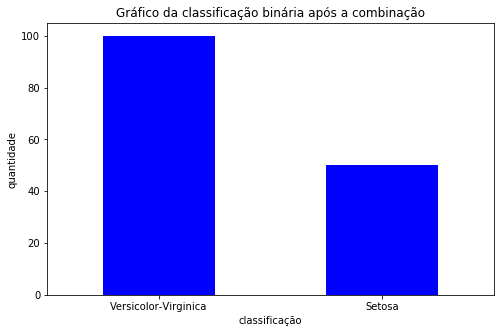

In [17]:
# criando o gráfico

dataset['classe'].value_counts().head(10).plot(kind='bar', figsize=(8,5), grid=False, rot=0, color='blue')
plt.title('Gráfico da classificação binária após a combinação')
plt.xlabel('classificação')
plt.ylabel('quantidade')
plt.show()

In [28]:
# adicionando valores binários para a classificação em uma nova coluna "valorBinario"
dataset.loc[(dataset["classe"] == "Setosa"), "valorBinario"] = 0
dataset.loc[(dataset["classe"] == "Versicolor-Virginica"), "valorBinario"] = 1

In [32]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,classe,valorBinario
0,5.1,3.5,1.4,0.2,Setosa,0.0
1,4.9,3.0,1.4,0.2,Setosa,0.0
2,4.7,3.2,1.3,0.2,Setosa,0.0
3,4.6,3.1,1.5,0.2,Setosa,0.0
4,5.0,3.6,1.4,0.2,Setosa,0.0


In [29]:
x_classe = dataset.classe
y_valorBinario = dataset.valorBinario
X = dataset.drop(["classe","valorBinario"], 1)

In [30]:
# Regressão Logística - Scikit

regressao = linear_model.LogisticRegression(C=1e15)
regressao.fit(X, y_valorBinario)
coeficientes = classificador.coef_
print(coeficientes)

[[-1.51526204 -4.92414975  7.80941844  3.81889579]]
